In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input, Convolution2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.utils import np_utils
import tensorflow

Using TensorFlow backend.
/home/prakhar/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/prakhar/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/prakhar/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/prakhar/.local/lib/python3.6/site-packages/tensorflow/py

## Data Preparation

In [2]:
x = pd.read_csv("./dataset/fashion-mnist_train.csv")
X_ = np.array(x)
X = X_[:, 1:]
X = X/255.0
Y = X_[:, 0]
print(X.shape, Y.shape)

(60000, 784) (60000,)


In [3]:
x_train = X.reshape((-1, 28, 28, 1))
y_train = np_utils.to_categorical(Y)

print(x_train.shape, y_train.shape)

(60000, 28, 28, 1) (60000, 10)


## Visualization

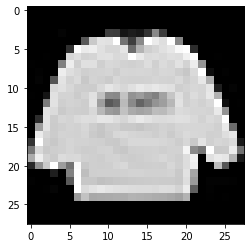

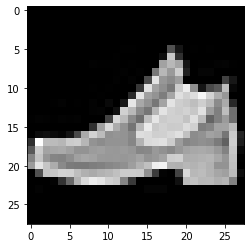

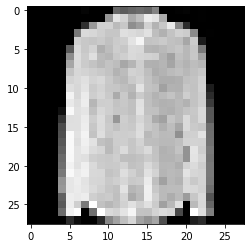

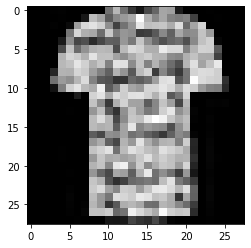

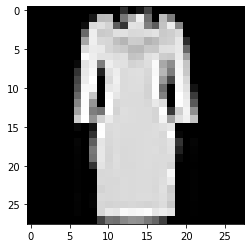

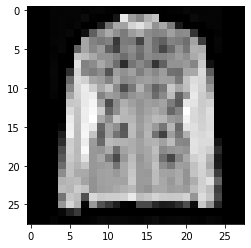

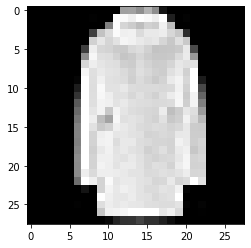

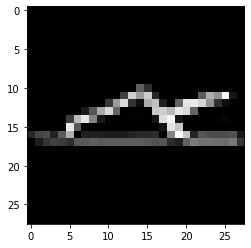

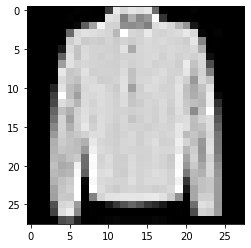

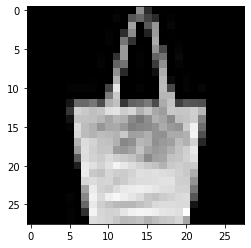

In [4]:
for i in range(10):
    plt.imshow(x_train[i].reshape((28, 28)), cmap='gray')
    plt.show()

## CNN Model

In [6]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Dropout(.25))
model.add(MaxPooling2D(2, 2))
model.add(Convolution2D(32, (5, 5), activation='relu'))
model.add(Convolution2D(8, (5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)    

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
hist = model.fit(x_train, y_train, epochs=20, shuffle=True, batch_size=256, validation_split=.20)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 25s 525us/step - loss: 0.8085 - acc: 0.7093 - val_loss: 0.5443 - val_acc: 0.8036
Epoch 2/20
48000/48000 [==============================] - 8s 168us/step - loss: 0.4518 - acc: 0.8361 - val_loss: 0.4313 - val_acc: 0.8542
Epoch 3/20
48000/48000 [==============================] - 8s 170us/step - loss: 0.3847 - acc: 0.8624 - val_loss: 0.3779 - val_acc: 0.8716
Epoch 4/20
48000/48000 [==============================] - 8s 171us/step - loss: 0.3549 - acc: 0.8731 - val_loss: 0.3884 - val_acc: 0.8678
Epoch 5/20
48000/48000 [==============================] - 9s 181us/step - loss: 0.3253 - acc: 0.8825 - val_loss: 0.3522 - val_acc: 0.8808
Epoch 6/20
48000/48000 [==============================] - 8s 171us/step - loss: 0.3028 - acc: 0.8919 - val_loss: 0.3208 - val_acc: 0.8947
Epoch 7/20
48000/48000 [==============================] - 9s 181us/step -

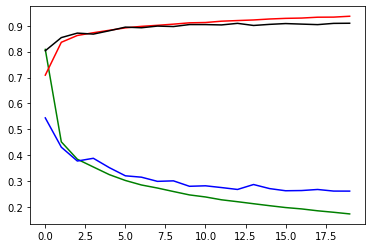

In [12]:
plt.figure(0)
plt.plot(hist.history['loss'], 'g')
plt.plot(hist.history['val_loss'], 'b')
plt.plot(hist.history['acc'], 'r')
plt.plot(hist.history['val_acc'], 'black')